   # EDA ON E-COMMERCE 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
df=pd.read_csv("C:\\Users\\Darshu\\Downloads\\ecommerce.csv",encoding='latin')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M') # adding date,time,month,day to dataframe

# Boxplot – All Numeric Variables


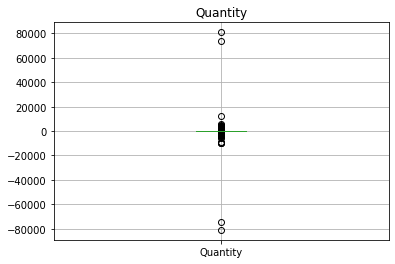

In [6]:
df.boxplot('Quantity')
plt.title('Quantity')
plt.show()

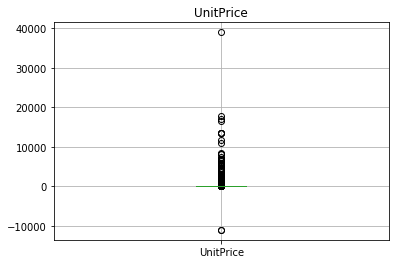

In [7]:
df.boxplot('UnitPrice')
plt.title('UnitPrice')
plt.show()

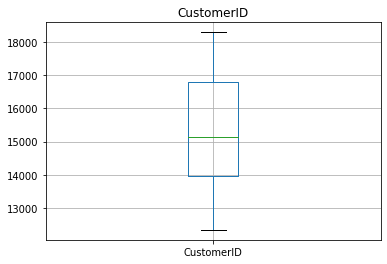

In [8]:
df.boxplot('CustomerID')
plt.title('CustomerID')
plt.show()

# Histogram – All Numeric Variables 

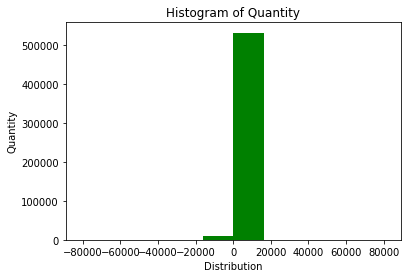

In [9]:
plt.title('Histogram of Quantity')
plt.xlabel('Distribution')
plt.ylabel('Quantity')
plt.hist(df['Quantity'],bins=10,color='green')
plt.show()

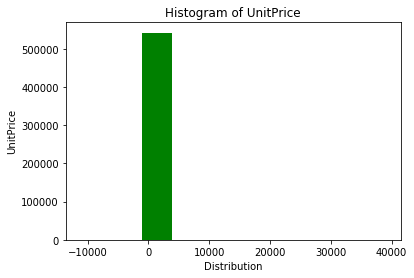

In [10]:
plt.title('Histogram of UnitPrice')
plt.xlabel('Distribution')
plt.ylabel('UnitPrice')
plt.hist(df['UnitPrice'],bins=10,color='green')
plt.show()

C:\Users\Darshu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Darshu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


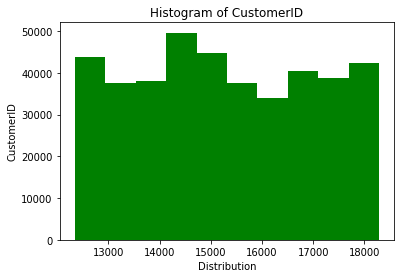

In [11]:
plt.title('Histogram of CustomerID')
plt.xlabel('Distribution')
plt.ylabel('CustomerID')
plt.hist(df['CustomerID'],bins=10,color='green')
plt.show()

# Distribution Plot – All Numeric Variables 

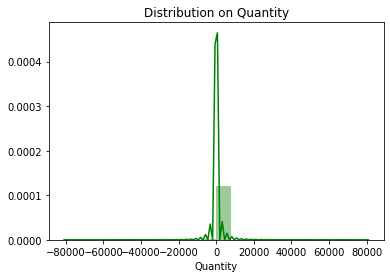

In [12]:
sns.distplot(df['Quantity'],bins=20,color='green')
plt.title('Distribution on Quantity')
plt.show()

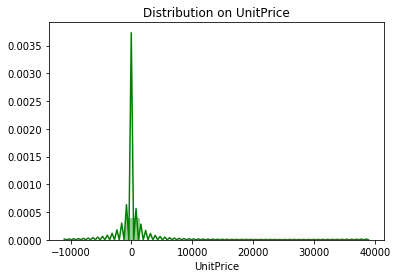

In [13]:
sns.distplot(df['UnitPrice'],bins=20,color='green')
plt.title('Distribution on UnitPrice')
plt.show()

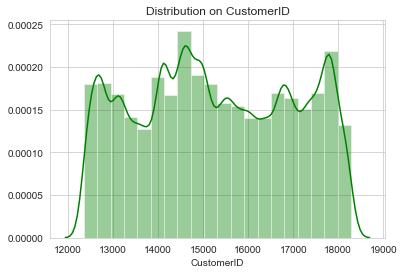

In [14]:
sns.set_style('whitegrid')
sns.distplot(df['CustomerID'],bins=20,color='green')
plt.title('Distribution on CustomerID')
plt.show()

## Aggregation for all numerical columns

In [15]:
#df.describe().mean()
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## unique values across all numerical columns

In [16]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# Duplicate values across all columns 

In [17]:
dup= df[df.duplicated()].count()
dup

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

# Correlation – Heatmap - All Numeric Variables

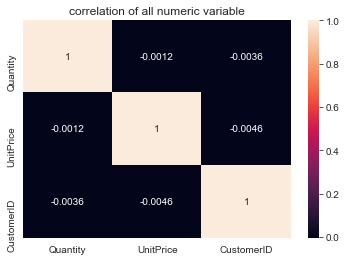

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.title('correlation of all numeric variable')
plt.show()

# Regression Plot - All Numeric Variables 

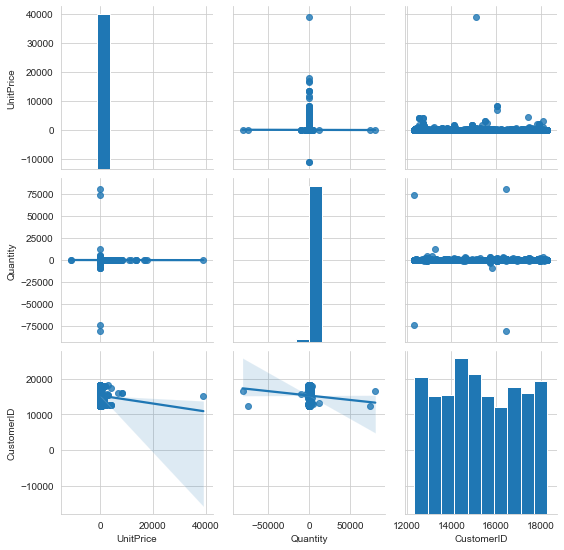

In [19]:
sns.pairplot(df,vars=['UnitPrice','Quantity','CustomerID'] ,palette='husl',kind='reg')
plt.show()

# Bar Plot – Every Categorical Variable vs every Numerical Variable 


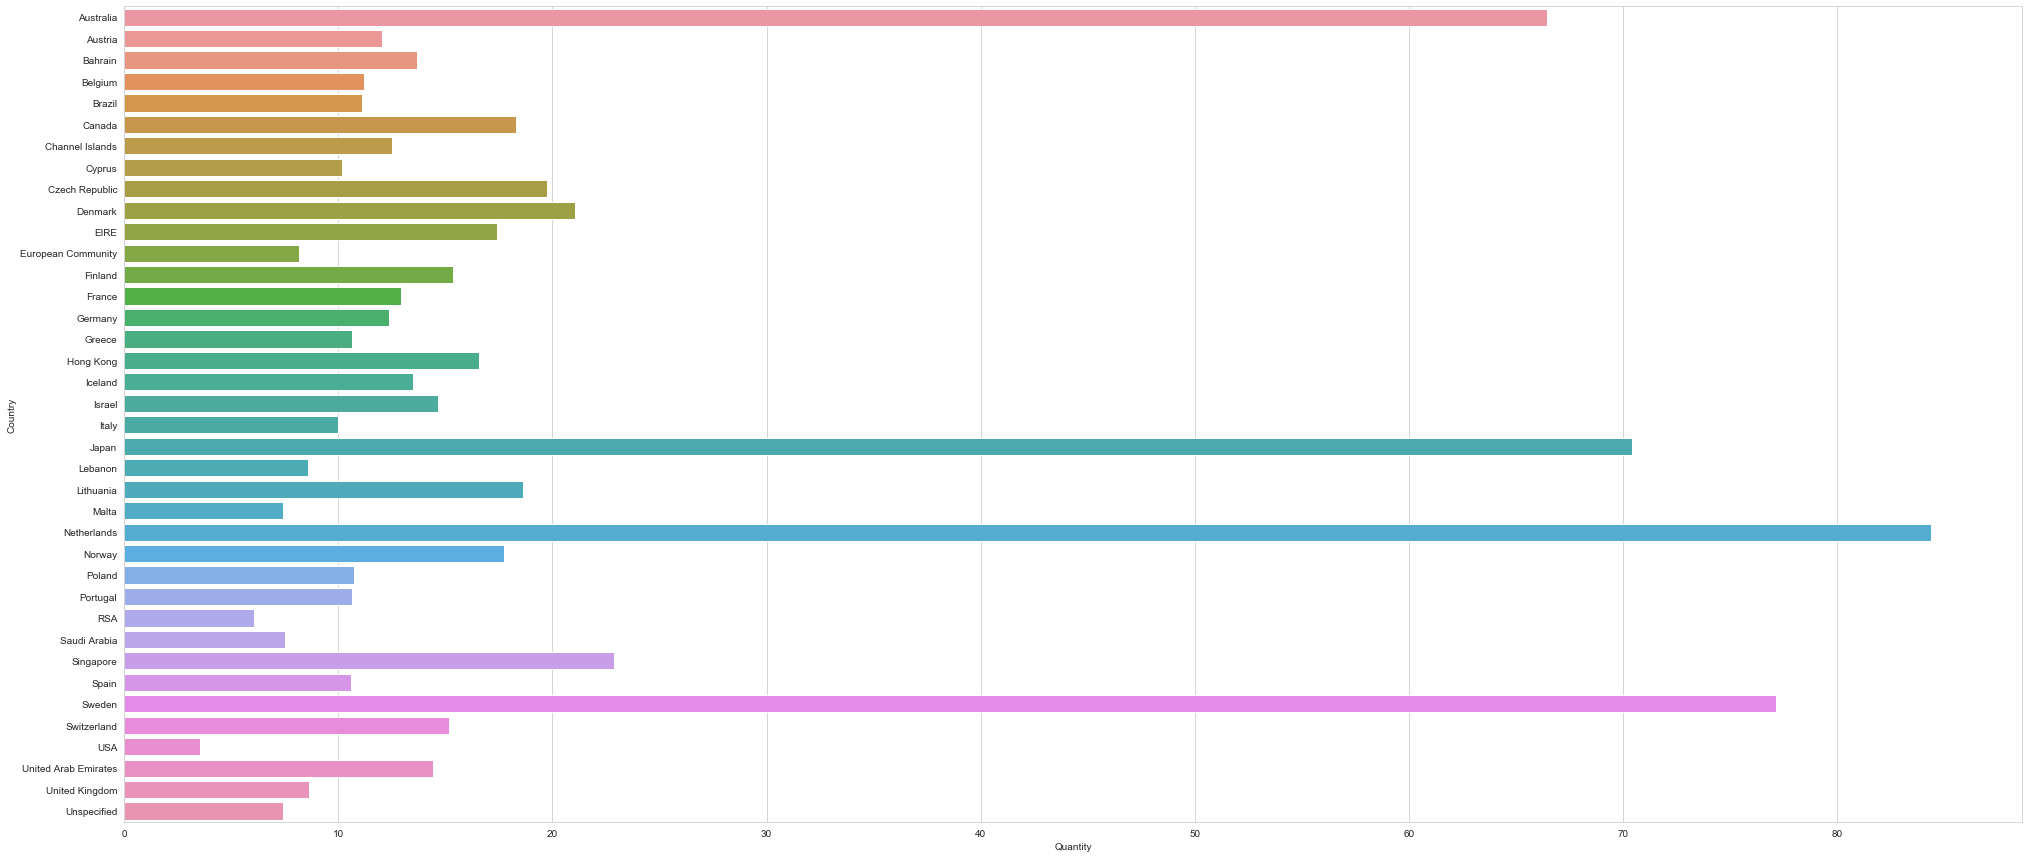

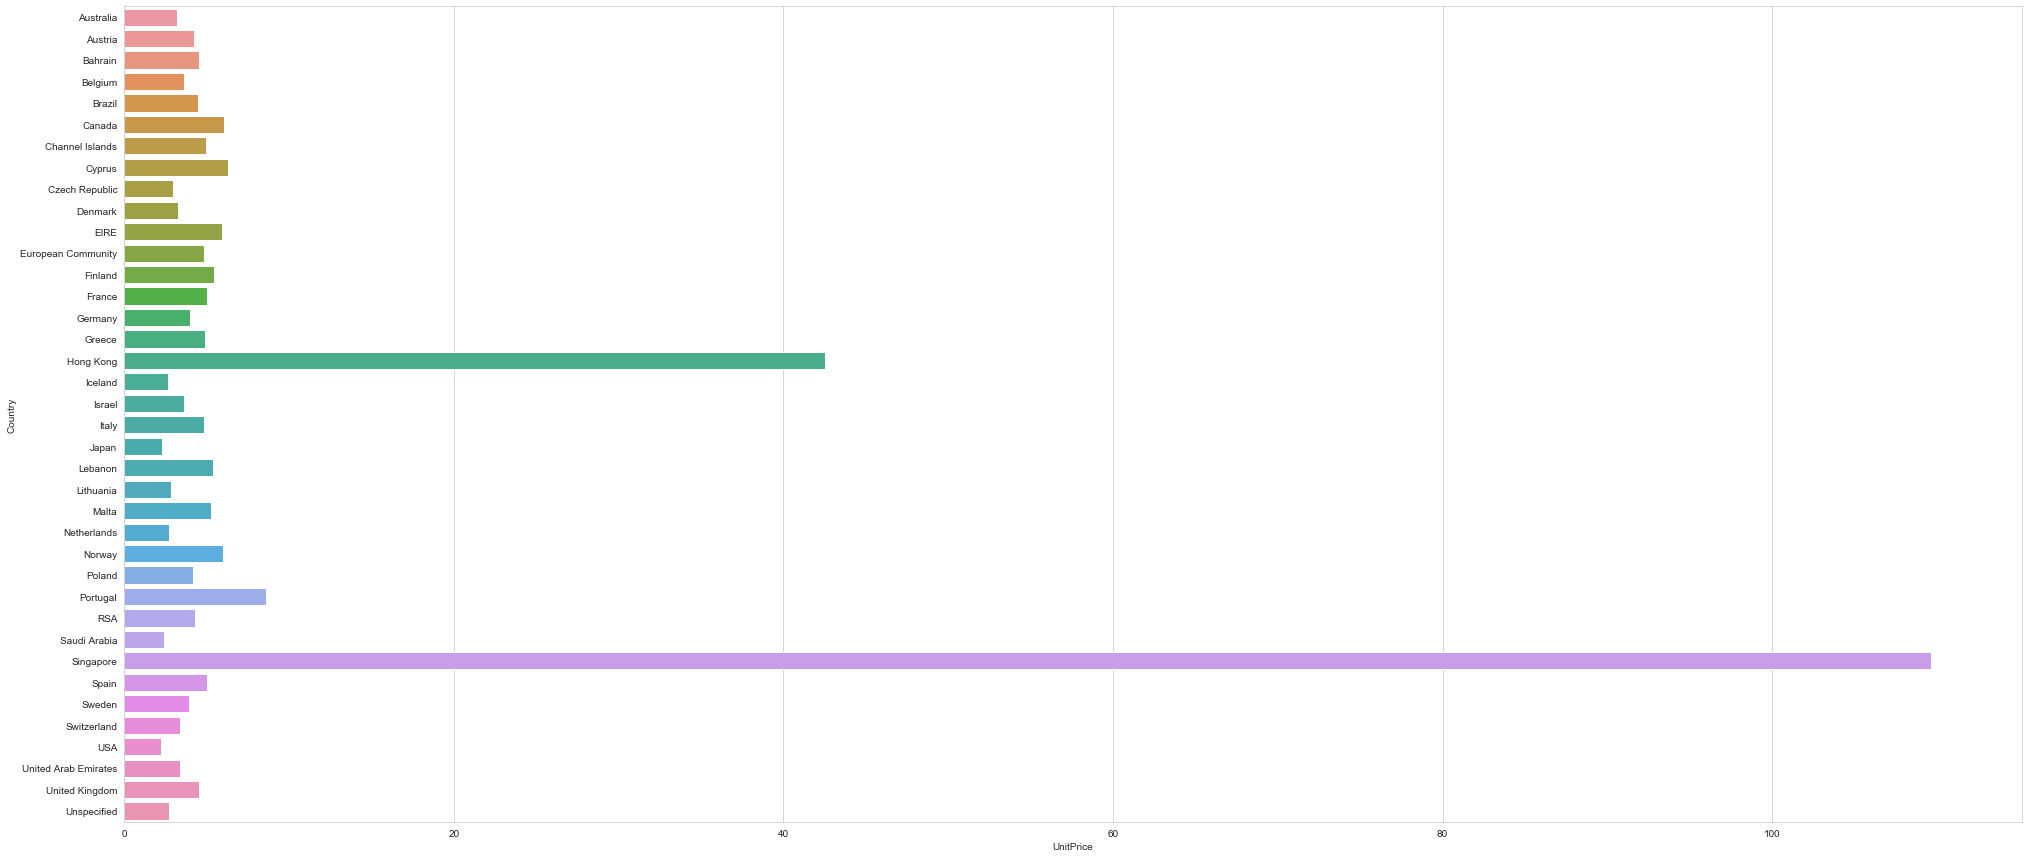

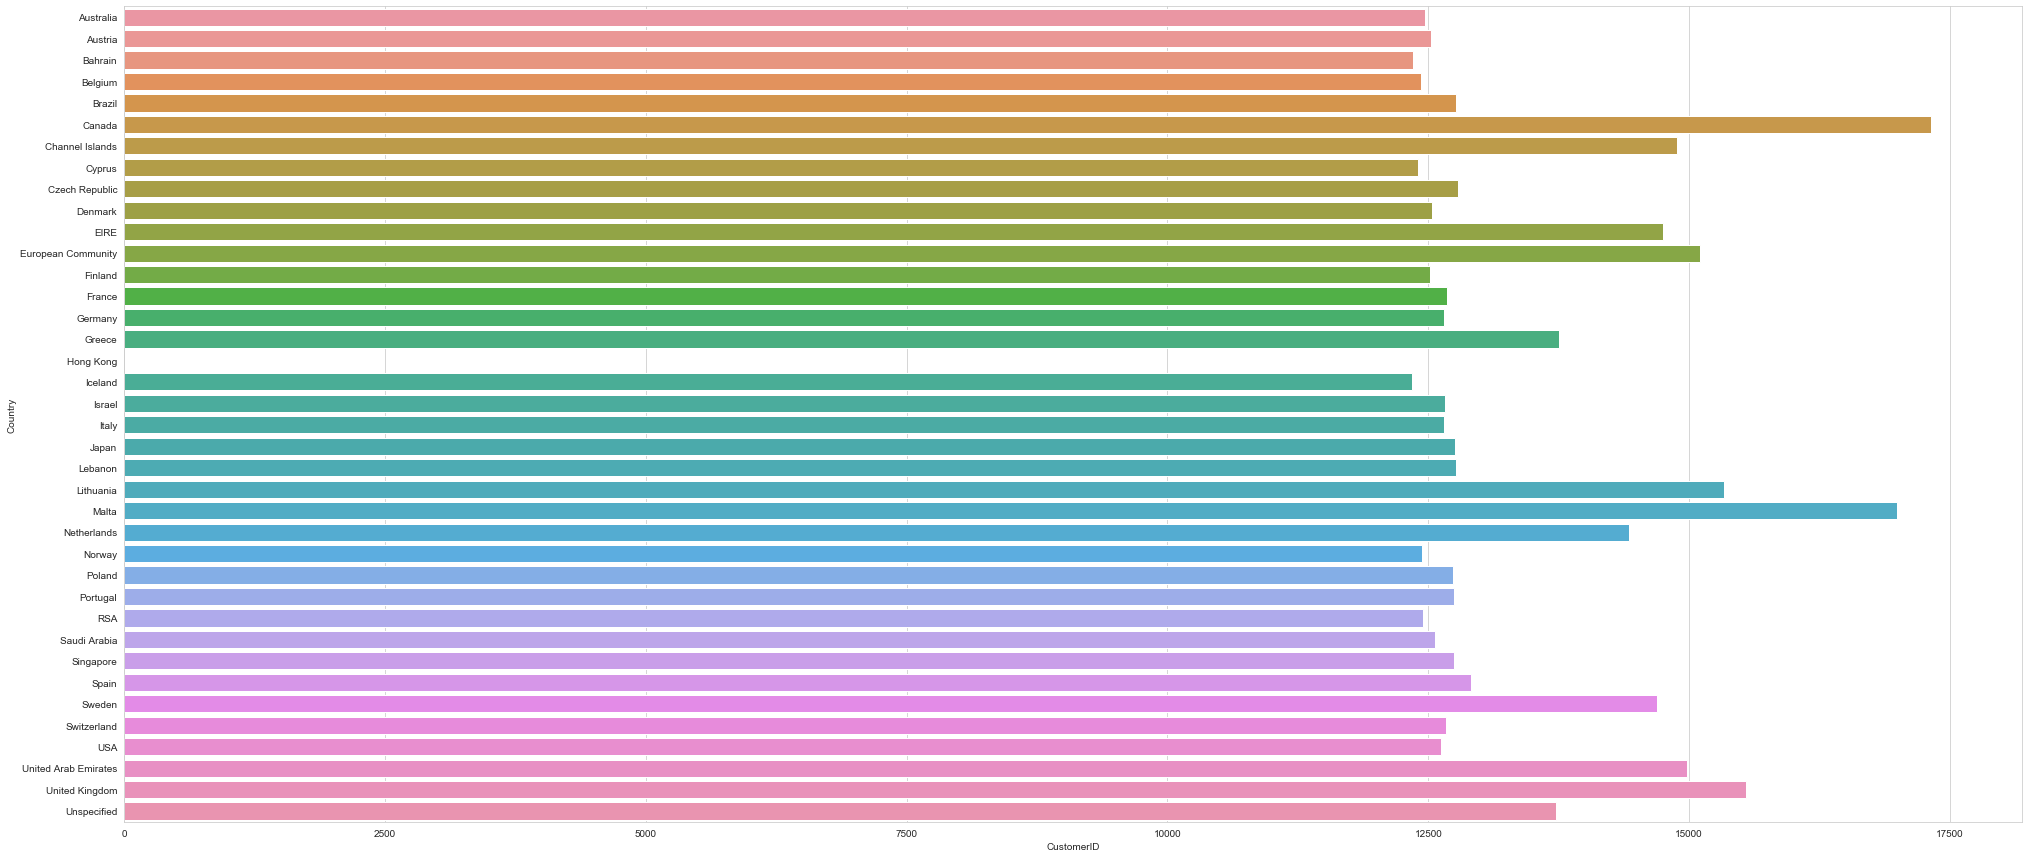

In [20]:
categorical_variable=['Country']
numerical_columns=['Quantity','UnitPrice','CustomerID']
for i in categorical_variable:
    for j in numerical_columns:
        plt.figure(figsize=(34,15))
        data=df.groupby(i).mean()
        sns.barplot(y=data.index,x=data[j])
        plt.show()


# Pair plot - All Numeric Variables

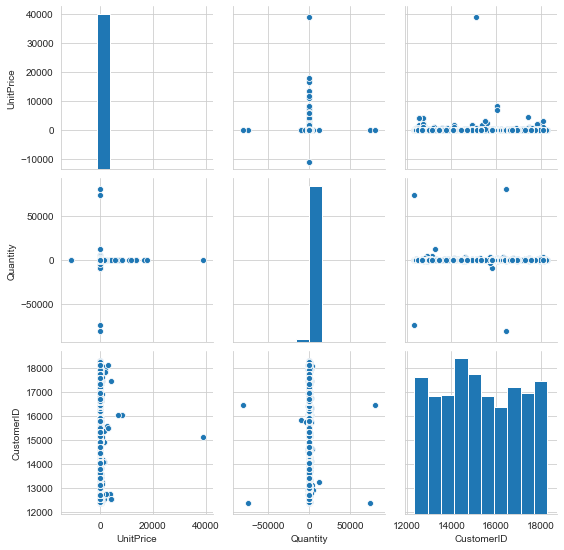

In [21]:
sns.pairplot(df,vars=['UnitPrice','Quantity','CustomerID'] ,palette='husl')
sns.set(style='ticks')
plt.show()

# Line chart to show the trend of data - All Numeric/Date Variables 

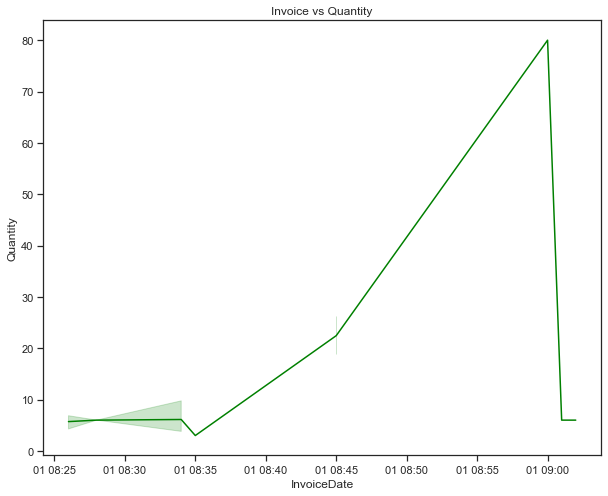

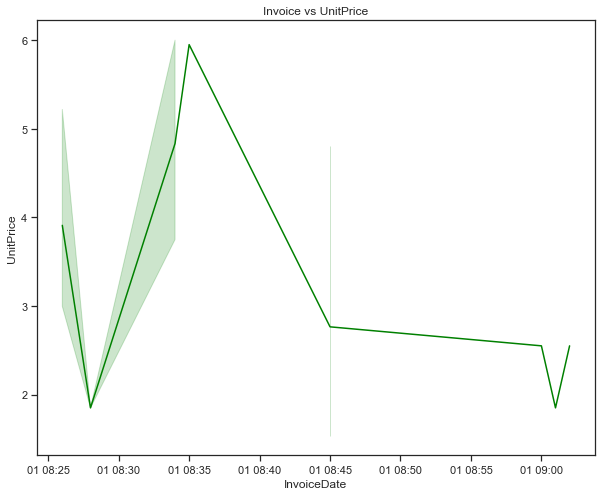

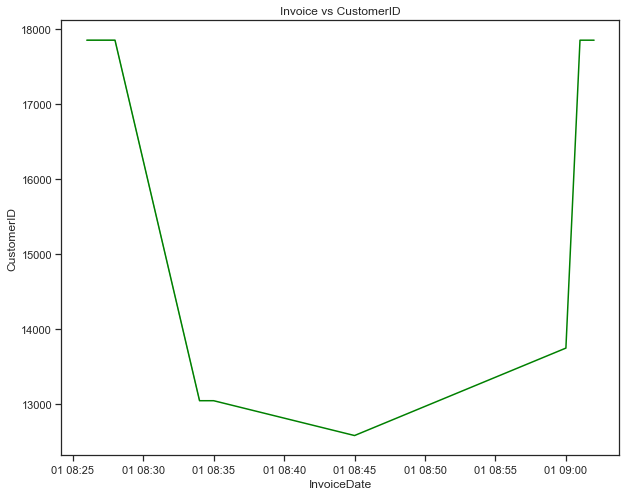

In [22]:
plt.figure(figsize=(10,8))
sns.lineplot(x='InvoiceDate',y='Quantity',data=df[:50],color='green')
plt.title('Invoice vs Quantity')
plt.show()

plt.figure(figsize=(10,8))
sns.lineplot(x='InvoiceDate',y='UnitPrice',data=df[:50],color='green')
plt.title('Invoice vs UnitPrice')
plt.show()

plt.figure(figsize=(10,8))
sns.lineplot(x='InvoiceDate',y='CustomerID',data=df[:50],color='green')
plt.title('Invoice vs CustomerID')
plt.show()

# Plot the skewness - All Numeric Variables

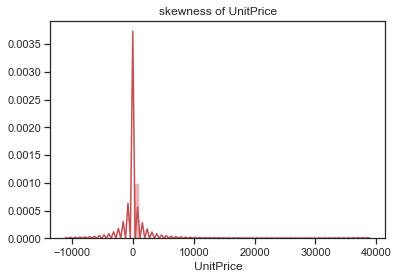

The skewness of this distribution is 186.50697172054137


In [23]:
sns.distplot(df['UnitPrice'],color='r')
plt.title('skewness of UnitPrice')
plt.show()
print('The skewness of this distribution is',df['UnitPrice'].skew())

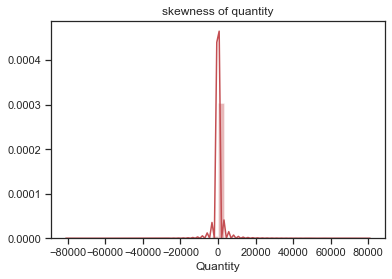

The skewness of this distribution is -0.2640763070668848


In [24]:
sns.distplot(df['Quantity'],color='r')
plt.title('skewness of quantity')
plt.show()
print('The skewness of this distribution is',df['Quantity'].skew())

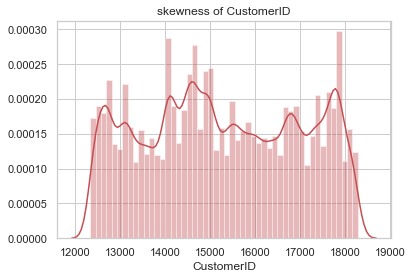

The skewness of this distribution is 0.02983499005167725


In [25]:
sns.set_style('whitegrid')
sns.distplot(df['CustomerID'],color='r')
plt.title('skewness of CustomerID')
plt.show()
print('The skewness of this distribution is',df['CustomerID'].skew())

###  2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode) 


In [26]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [27]:
df['CustomerID'].fillna(df['CustomerID'].mode() , inplace=True)
df['Description'].fillna(df['Description'].mode() , inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 3.remove duplicate rows


In [28]:
df1=df.drop_duplicates()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 4. Remove rows which have negative values in Quantity column 


In [29]:
df1=df[df.Quantity>0]
df1.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,531285.00,531285.00,397924.00
mean,10.66,3.86,15294.32
std,156.83,41.81,1713.17
min,1.00,-11062.06,12346.00
25%,1.00,1.25,13969.00
50%,3.00,2.08,15159.00
75%,10.00,4.13,16795.00
max,80995.00,13541.33,18287.00


# 5. Add the columns - Month, Day and Hour for the invoice 


In [30]:
df1.insert(loc=2, column='year_month', value=df1['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df1.insert(loc=3, column='month', value=df1.InvoiceDate.dt.month)
df1.insert(loc=4, column='day', value=(df1.InvoiceDate.dt.dayofweek)+1)
df1.insert(loc=5, column='hour', value=df1.InvoiceDate.dt.hour)

# 6. How many orders made by the customers


In [31]:
df1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


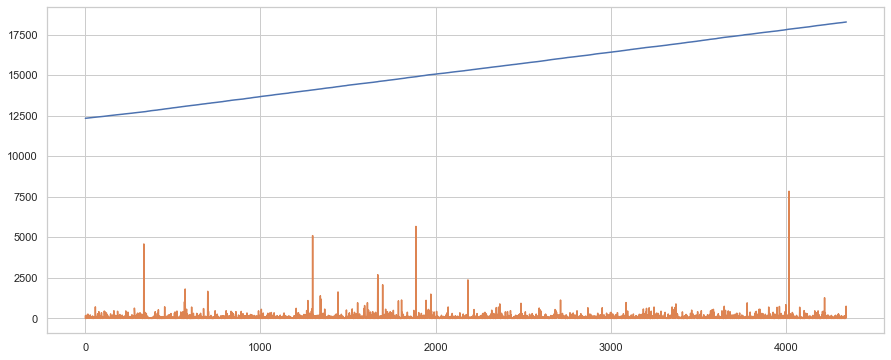

In [32]:
orders=df1.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID)
plt.plot(orders.InvoiceNo)
plt.show()

# 7. TOP 5 customers with higher number of orders 


In [33]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


# 8. How much money spent by the customers


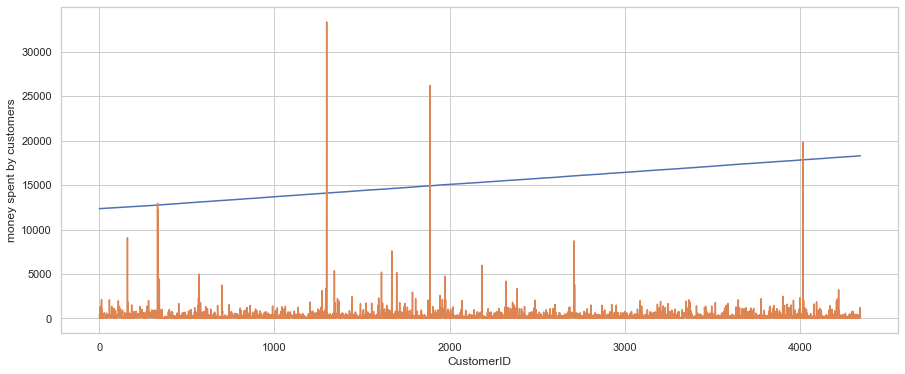

In [34]:
moneyspent=df1.groupby(by=['CustomerID','Country'],as_index=False)['UnitPrice'].sum()
plt.subplots(figsize=(15,6))
plt.plot(moneyspent.CustomerID)
plt.plot(moneyspent.UnitPrice)
plt.xlabel('CustomerID')
plt.ylabel('money spent by customers')
plt.show()

# 9. Top 5 customers with highest money spent


In [35]:
print('The TOP 5 customers with highest money spent...')
moneyspent.sort_values(by='UnitPrice', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,UnitPrice
1298,14096.0,United Kingdom,33332.45
1888,14911.0,EIRE,26185.72
4019,17841.0,United Kingdom,19848.49
332,12744.0,Singapore,12949.99
334,12748.0,United Kingdom,12205.60


# 10. How many orders per month


In [36]:
ax = df1.groupby('InvoiceNo')['month'].unique().value_counts().sort_index()
ax

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]     1120
[2]     1126
[3]     1531
[4]     1318
[5]     1731
[6]     1576
[7]     1540
[8]     1409
[9]     1896
[10]    2129
[11]    2884
[12]    2468
Name: month, dtype: int64

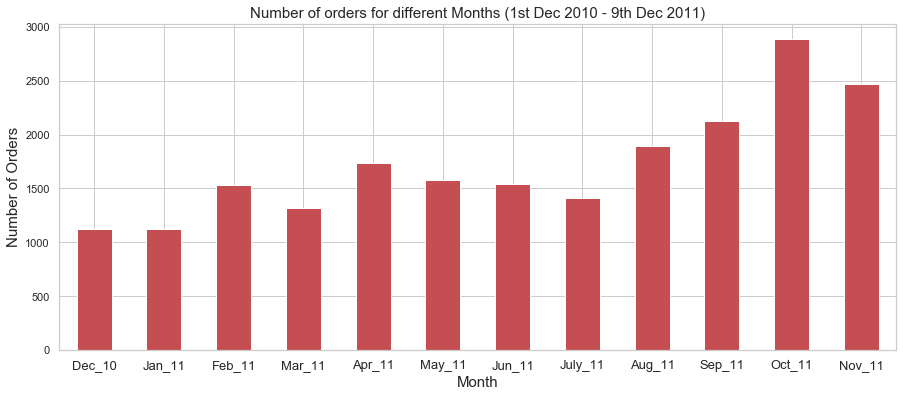

In [37]:
ax = df1.groupby('InvoiceNo')['month'].unique().value_counts().sort_index().plot(kind='bar',color='r',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()


# 11. How many orders per day


In [38]:
df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    3237
[2]    3717
[3]    3865
[4]    4408
[5]    3294
[7]    2207
Name: day, dtype: int64

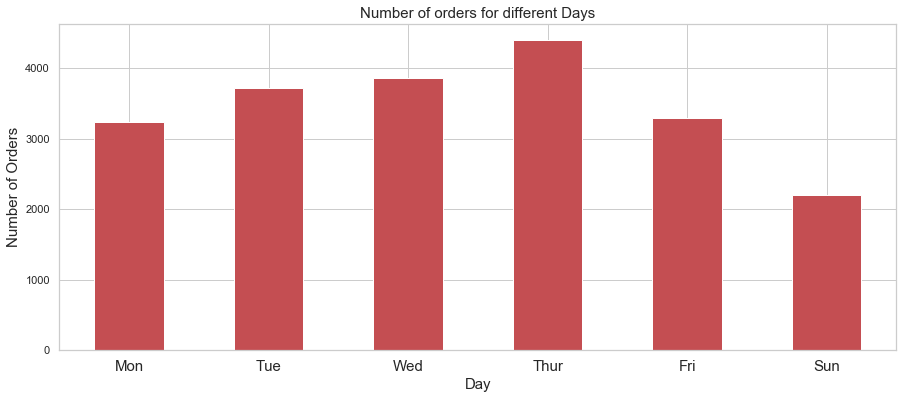

In [39]:
ax = df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar', color='r',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour


In [40]:
df1.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]        1
[7]       29
[8]      568
[9]     1538
[10]    2431
[11]    2472
[12]    3322
[13]    2818
[14]    2557
[15]    2474
[16]    1406
[17]     738
[18]     209
[19]     146
[20]      18
Name: hour, dtype: int64

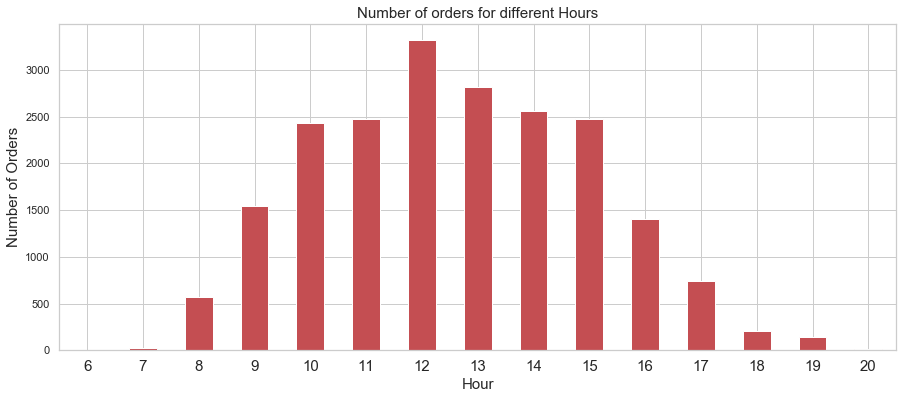

In [41]:
ax = df1.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='r',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

# 13. How many orders for each country


In [42]:
country_orders = df1.groupby('Country')['InvoiceNo'].count().sort_values()
country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  284
Israel                     295
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                446
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1501
Switzerland               1967
Belgium                   2031


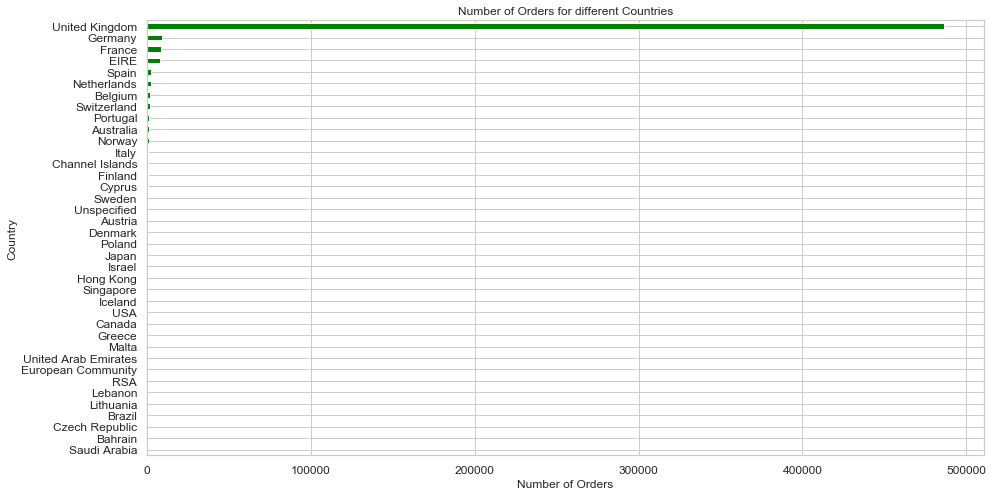

In [43]:
plt.subplots(figsize=(15,8))
country_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14. Orders trend across months

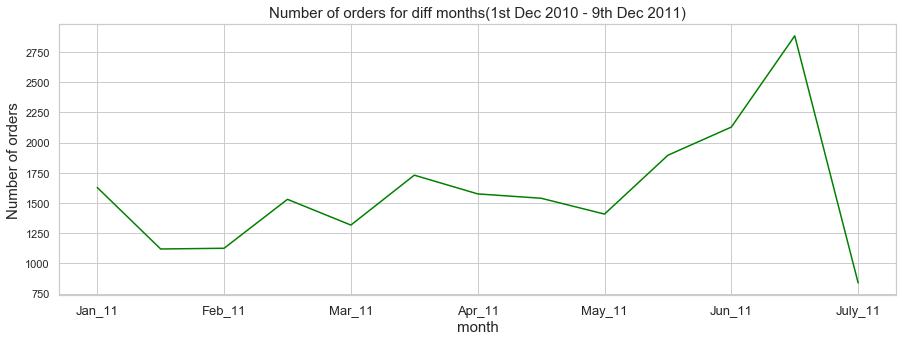

In [44]:
ax=df1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(color='green',grid=True,figsize=(15,5))
ax.set_xlabel('month',fontsize=15)
ax.set_ylabel('Number of orders',fontsize=15)
ax.set_title('Number of orders for diff months(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'),rotation='horizontal',fontsize=13)
plt.show()

# 15. How much money spent by each country

In [45]:
country_amount_spent = df1.groupby('Country')['UnitPrice'].sum().sort_values()
country_amount_spent

Country
Saudi Arabia            2.116000e+01
Czech Republic          7.827000e+01
Bahrain                 8.276000e+01
Lithuania               9.944000e+01
Brazil                  1.426000e+02
United Arab Emirates    2.298900e+02
Lebanon                 2.424400e+02
RSA                     2.481000e+02
European Community      2.898000e+02
USA                     4.133000e+02
Iceland                 4.812100e+02
Malta                   5.451900e+02
Japan                   6.572100e+02
Greece                  6.632900e+02
Canada                  9.105800e+02
Israel                  1.070980e+03
Denmark                 1.195550e+03
Unspecified             1.204010e+03
Poland                  1.377210e+03
Austria                 1.693900e+03
Sweden                  1.695790e+03
Channel Islands         3.389650e+03
Cyprus                  3.506180e+03
Italy                   3.576210e+03
Australia               3.612500e+03
Finland                 3.628440e+03
Norway                  5.6624

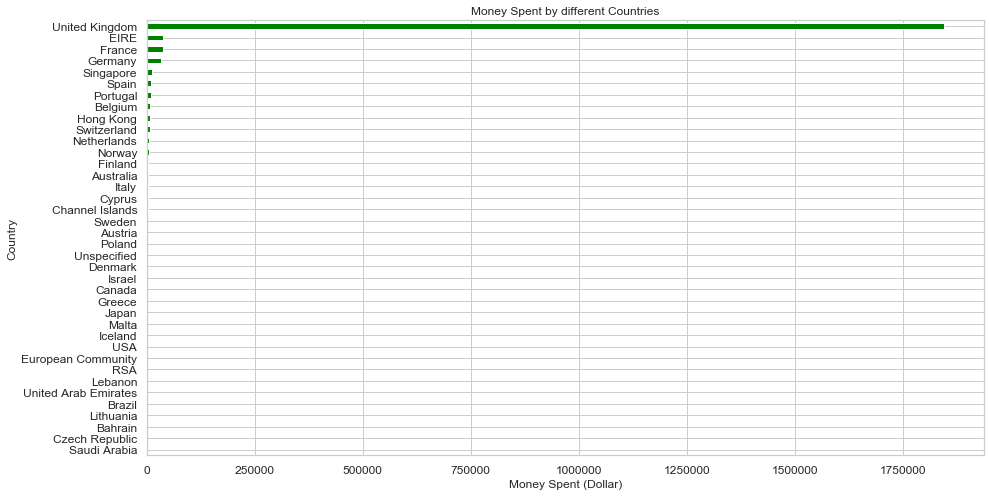

In [46]:
plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()